In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

In [2]:
df_rating = pd.read_csv("ratings.csv")
df_whiskey = pd.read_csv("whiskey.csv")

In [3]:
df_rating

,UID,whiskey,Liking - DEPENDANT VARIABLE
0,1101,873,9
1,1101,462,4
2,1101,423,3
3,1101,324,1
4,1101,754,3
...,...,...,...
4683,1475,378,3
4684,1475,617,2
4685,1475,982,6
4686,1475,948,2


In [4]:
df_whiskey

,Whiskey,Harshness,Sweetness,Nutiness,Smokiness,Creaminess
0,110,6.93,5.61,4.30,6.44,6.18
1,121,7.79,5.45,4.67,6.34,6.84
2,135,5.50,6.77,5.92,4.91,4.15
3,171,6.90,5.36,4.51,5.23,6.19
4,231,5.25,7.02,6.66,6.33,3.69
5,248,5.87,6.31,5.52,4.48,5.10
6,274,5.53,6.38,5.57,5.58,4.38
7,299,5.16,5.27,4.29,3.36,4.77
8,305,5.98,6.80,5.82,6.33,4.61
9,324,7.20,7.26,6.83,6.22,4.82


In [7]:
df_rating["whiskey"] = df_whiskey["Whiskey"].astype(int)
df = pd.merge(df_rating, df_whiskey, left_on="whiskey", right_on="Whiskey")

In [8]:
df

,UID,whiskey,Liking - DEPENDANT VARIABLE,Whiskey,Harshness,Sweetness,Nutiness,Smokiness,Creaminess
0,1101,110.0,9,110,6.93,5.61,4.30,6.44,6.18
1,1101,121.0,4,121,7.79,5.45,4.67,6.34,6.84
2,1101,135.0,3,135,5.50,6.77,5.92,4.91,4.15
3,1101,171.0,1,171,6.90,5.36,4.51,5.23,6.19
4,1101,231.0,3,231,5.25,7.02,6.66,6.33,3.69
5,1101,248.0,8,248,5.87,6.31,5.52,4.48,5.10
6,1101,274.0,4,274,5.53,6.38,5.57,5.58,4.38
7,1101,299.0,7,299,5.16,5.27,4.29,3.36,4.77
8,1101,305.0,2,305,5.98,6.80,5.82,6.33,4.61
9,1101,324.0,5,324,7.20,7.26,6.83,6.22,4.82


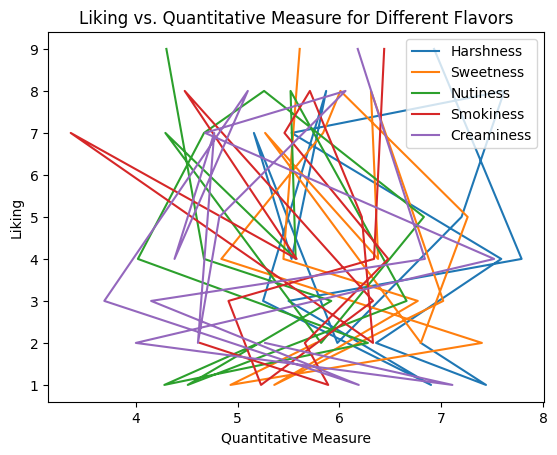

In [28]:
y = df_sample['Liking - DEPENDANT VARIABLE']

# 列出所有风味特征的名称
flavors = ['Harshness', 'Sweetness', 'Nutiness', 'Smokiness', 'Creaminess']

# 为每个风味绘制一条线
for flavor in flavors:
    plt.plot(df_sample[flavor],y, label=flavor)

# 添加图例
plt.legend()

# 设置x轴和y轴的标签
plt.xlabel('Quantitative Measure')
plt.ylabel('Liking')

# 设置图表标题
plt.title('Liking vs. Quantitative Measure for Different Flavors')

# 显示图表
plt.show()

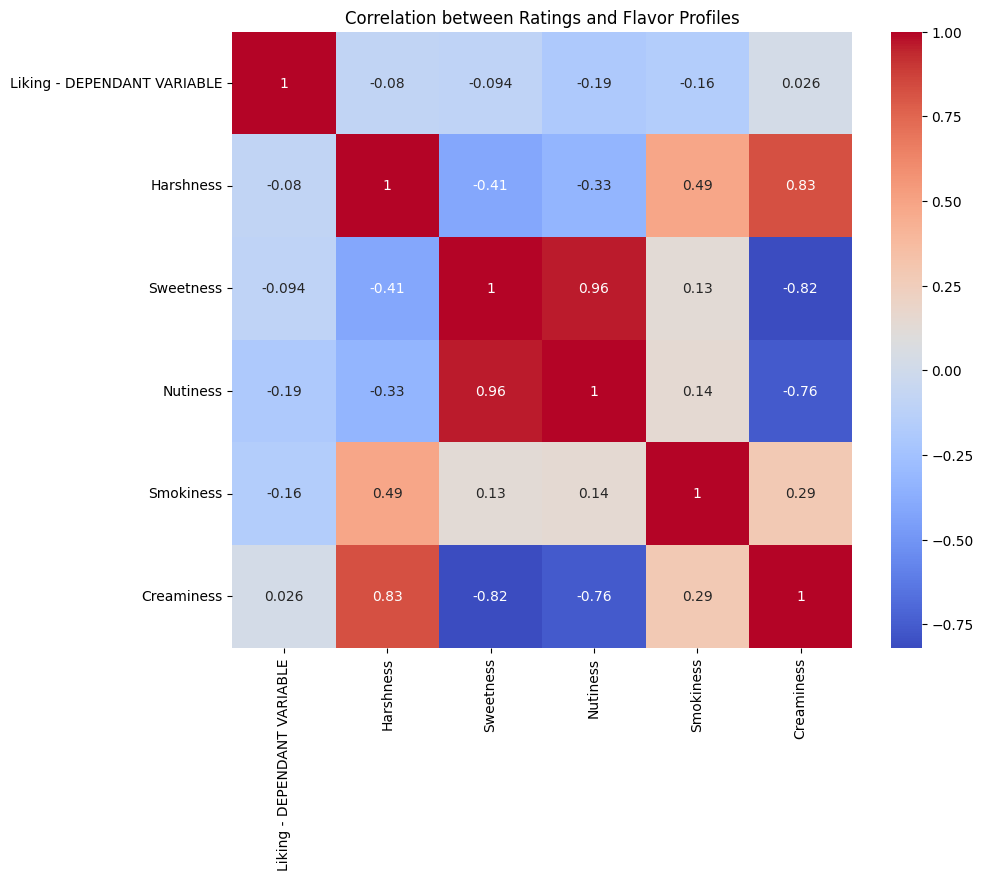

In [25]:
correlation_matrix = df_sample.drop(['UID', 'whiskey', 'Whiskey'], axis = 1).corr()
# 可视化相关性矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Ratings and Flavor Profiles')
plt.show()

### Linear Regression

In [34]:
sample_uid = df['UID'].unique()[0]
df_sample = df[df['UID'] == sample_uid]

# 分割数据
X = df_sample[['Harshness', 'Sweetness', 'Nutiness', 'Smokiness', 'Creaminess']]
y = df_sample['Liking - DEPENDANT VARIABLE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)

# 预测和评估
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE for UID {sample_uid}: {mse}')
print(f'R-squared: {r2}')


MSE for UID 1101: 14.229518165184423
R-squared: -0.3882456746521388


### Decision Tree Regressor

In [35]:
tree_reg = DecisionTreeRegressor(random_state=42)

# 训练模型
tree_reg.fit(X_train, y_train)

y_pred = tree_reg.predict(X_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 21.5
R-squared: -1.0975609756097562
